#Importing the CSV files into Database

In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

In [2]:
logging.basicConfig(
    filename="content/logs/ingestion_db.log",
    format="%(asctime)s - %(levelname)s - %(message)s",
    level=logging.DEBUG,
    filemode="a"
)

In [3]:
engine = create_engine('sqlite:///inventor.db')

In [4]:
'''This function will ingest Data Frame into Database'''
def ingest_db(df, table_name, engine):
  df.to_sql(table_name, con = engine, if_exists='replace', index=False)

In [5]:
def load_raw_data():
    start_time = time.time()
    for file in os.listdir('/content'):
        if '.csv' in file:
            table_name = file[:-4]
            logging.info(f'Attempting to process file: {file}')
            try:
                logging.info(f'Starting ingestion of {file} into table {table_name}')
                # Read CSV in chunks
                chunk_size = 10000 # Reduced chunk size
                for i, chunk in enumerate(pd.read_csv(file, chunksize=chunk_size)):
                    logging.info(f'Ingesting chunk {i} of {file}')
                    try:
                        chunk.to_sql(table_name, con=engine, if_exists='append' if i > 0 else 'replace', index=False)
                        logging.info(f'Chunk {i} of {file} ingested successfully')
                    except Exception as db_error:
                        logging.error(f'Error ingesting chunk {i} of {file} into database: {db_error}')
                        # Consider breaking or continuing based on severity of db error
                logging.info(f'{file} fully ingested successfully into table {table_name}')
                print(f'{file} fully ingested successfully into table {table_name}')
            except Exception as read_error:
                logging.error(f'Error reading or processing file {file}: {read_error}')

    end_time = time.time()
    total_time = (end_time - start_time) / 60
    logging.info(f'Total time taken for ingestion: {total_time:.2f} minutes')
    print(f'Total time taken for ingestion: {total_time:.2f} minutes')

In [6]:
if __name__ == "__main__":
    load_raw_data()

end_inventory.csv fully ingested successfully into table end_inventory
purchases.csv fully ingested successfully into table purchases
sales.csv fully ingested successfully into table sales
vendor_invoice.csv fully ingested successfully into table vendor_invoice
purchase_prices.csv fully ingested successfully into table purchase_prices
begin_inventory.csv fully ingested successfully into table begin_inventory
Total time taken for ingestion: 6.83 minutes


In [ ]:
'''This is failng due to Memory issue'''
def load_raw_data():
    start_time = time.time()
    for file in os.listdir('//content'):
        if '.csv' in file:
          df = pd.read_csv(file)
          ingest_db(df, file[:-4], engine)
          print(df.shape)
    end_time = time.time()
    total_time = (end_time - start_time) / 60
    logging.info(f'Total time taken for ingestion: {total_time:.2f} minutes')

'logs' directory already exists.


# Bsaic Exploratory Data Analysis

Understanding the dataset to explore how the data is present in the database and and if there is a need of creating some aggregated tables that can help with:
*   Vendor selection for profitability
*   Product pricing Optimization

In [7]:
import pandas as pd
import sqlite3

In [8]:
#creating database connection
conn = sqlite3.connect('inventor.db')
print("Opened database successfully")

Opened database successfully


In [ ]:
#checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,begin_inventory
1,vendor_invoice
2,end_inventory
3,purchase_prices
4,sales
5,purchases


Let's check the total records present in each table and display few records.

In [ ]:
for table in tables['name']:
  print("-"*50,table,"-"*50)
  print("Count of Records",pd.read_sql(f"SELECT count(*) AS count FROM {table}", conn)['count'][0])
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))

-------------------------------------------------- begin_inventory --------------------------------------------------
Count of Records 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of Records 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- end_inventory --------------------------------------------------
Count of Records 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of Records 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of Records 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- purchases --------------------------------------------------
Count of Records 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


In [ ]:
#Checking the datasets for the random vendor number 4466
vendor_invoice = pd.read_sql("SELECT * FROM vendor_invoice WHERE VendorNumber = 4466",conn)
purchase_prices = pd.read_sql("SELECT * FROM purchase_prices WHERE VendorNumber = 4466",conn)
purchases = pd.read_sql("SELECT * FROM purchases WHERE VendorNumber = 4466",conn)
sales = pd.read_sql("SELECT * FROM sales WHERE VendorNo = 4466",conn)

In [ ]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [ ]:
sales.groupby(['Brand'])[['SalesPrice','SalesQuantity','SalesDollars']].sum()

,SalesPrice,SalesQuantity,SalesDollars
Brand,,,
3140,30071.85,3890,50531.10
5215,41542.02,4651,60416.49
5255,51180.60,6096,79187.04


*   The purchases table contains actual purchase data, including the date of purchase, products(brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.
*   The purchase price column is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.
*   The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with and additional column for freight. This table maintains uniqueness based on vendor and PO number.
*   The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.

As the data that we need for the analysis is distributed in different tables, we need to create a summary table containing:
*   purchase transactions made by vendors
*   sales transaction data
*   freight costs for each vendor.
*   actual product prices from vendors.

In [ ]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [ ]:
pd.read_sql('''SELECT VendorNumber, SUM(Quantity) AS total_quantity,
SUM(Dollars) AS total_dollars, SUM(Freight) AS total_freight
FROM vendor_invoice GROUP BY VendorNumber''', conn)

,VendorNumber,total_quantity,total_dollars,total_freight
0,2,328,5630.88,27.08
1,54,1,105.07,0.48
2,60,4732,76770.25,367.52
3,105,332,11706.20,62.39
4,200,132,1205.16,6.19
...,...,...,...,...
121,98450,10463,168993.61,856.02
122,99166,1212,25961.04,130.09
123,172662,1629,34708.03,178.34
124,173357,1990,41036.44,202.50


In [ ]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [ ]:
purchases.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [ ]:
pd.read_sql('''SELECT p.VendorNumber, p.VendorName,
p.Brand, p.PurchasePrice,
pp.Volume AS volume, pp.Price AS actual_price,
SUM(p.Quantity) AS total_purchase_quantity,
SUM(p.Dollars) AS total_purchase_dollars
FROM purchases p
JOIN purchase_prices pp ON p.Brand = pp.Brand
WHERE p.PurchasePrice > 0
GROUP BY p.VendorNumber, p.VendorName, p.Brand''', conn)

,VendorNumber,VendorName,Brand,PurchasePrice,volume,actual_price,total_purchase_quantity,total_purchase_dollars
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,23.86,750,36.99,8,190.88
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,17.00,162.5,24.99,320,5440.00
2,54,AAPER ALCOHOL & CHEMICAL CO,990,105.07,3750,134.49,1,105.07
3,60,ADAMBA IMPORTS INTL INC,771,11.44,750,14.99,39,446.16
4,60,ADAMBA IMPORTS INTL INC,3401,11.10,1750,14.99,6,66.60
...,...,...,...,...,...,...,...,...
10687,173357,TAMWORTH DISTILLING,2804,32.14,750,44.99,210,6749.40
10688,173357,TAMWORTH DISTILLING,3666,18.79,375,24.99,520,9770.80
10689,173357,TAMWORTH DISTILLING,3848,23.30,750,30.99,28,652.40
10690,173357,TAMWORTH DISTILLING,3909,19.37,750,24.99,1232,23863.84


In [ ]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [ ]:
pd.read_sql('''SELECT VendorNo, Brand,
SUM(SalesPrice) AS total_sales_price,
SUM(SalesQuantity) AS total_sales_quantity,
SUM(SalesDollars) AS total_sales_dollars,
SUM(ExciseTax) AS total_ExciseTax
FROM sales GROUP BY VendorNo, Brand''', conn)

,VendorNo,Brand,total_sales_price,total_sales_quantity,total_sales_dollars,total_ExciseTax
0,2,90085,295.92,18,665.82,2.00
1,2,90609,449.82,24,599.76,0.52
2,60,771,494.67,47,704.53,37.01
3,60,3979,41682.51,3931,66871.69,7224.06
4,105,2529,59.98,12,359.88,9.44
...,...,...,...,...,...,...
11267,173357,2804,3194.29,140,6298.60,110.33
11268,173357,3666,4873.05,360,8996.40,141.19
11269,173357,3848,92.97,6,185.94,4.71
11270,173357,3909,14469.21,982,24540.18,773.87


In [9]:
#Taking the entire tables
vendor_invoice = pd.read_sql("SELECT * FROM vendor_invoice",conn)
purchase_prices = pd.read_sql("SELECT * FROM purchase_prices",conn)
purchases = pd.read_sql("SELECT * FROM purchases",conn)

chunk_size = 1000000  # Defined a suitable chunk size
all_sales_chunks = [] # Initialize an empty list to store the chunks

# Iterate over chunks of the sales table
for i, sales_chunk in enumerate(pd.read_sql("SELECT * FROM sales", conn, chunksize=chunk_size)):
    print(f"Processing chunk {i+1}, containing {len(sales_chunk)} rows.")

    # Append the current chunk to the list
    all_sales_chunks.append(sales_chunk)

# Concatenate all the chunks into a single DataFrame after the loop
# Be aware that this step will still require enough memory to hold the final DataFrame
try:
    sales = pd.concat(all_sales_chunks, ignore_index=True)
    print("\nSuccessfully combined all chunks into the 'sales' DataFrame.")
    print(f"Shape of the final sales DataFrame: {sales.shape}")
except Exception as e:
    print(f"\nError concatenating chunks: {e}")
    print("This might still be a memory issue if the combined DataFrame is too large.")

Processing chunk 1, containing 1000000 rows.
Processing chunk 2, containing 1000000 rows.
Processing chunk 3, containing 1000000 rows.
Processing chunk 4, containing 1000000 rows.
Processing chunk 5, containing 1000000 rows.
Processing chunk 6, containing 1000000 rows.
Processing chunk 7, containing 1000000 rows.
Processing chunk 8, containing 1000000 rows.
Processing chunk 9, containing 1000000 rows.
Processing chunk 10, containing 1000000 rows.
Processing chunk 11, containing 1000000 rows.
Processing chunk 12, containing 1000000 rows.
Processing chunk 13, containing 825363 rows.

Successfully combined all chunks into the 'sales' DataFrame.
Shape of the final sales DataFrame: (12825363, 14)


In [ ]:
#This query is taking lot of time to execute so we will optimize this query
final_table = pd.read_sql_query('''
SELECT pp.VendorNumber,
pp.Brand,
pp.Price AS ActualPrice,
pp.PurchasePrice,
SUM(s.SalesQuantity) AS TotslSalesQuantity,
SUM(s.SalesDollars) AS TotalSalesDollar,
SUM(s.SalesPrice) AS TotalSalesPrice,
SUM(s.ExciseTax) AS TotalExciseTax,
SUM(vi.Quantity) AS TotalPurchaseQuantity,
SUM(vi.Dollars) AS TotalPurchaseDollars,
SUM(vi.Freight) AS TotalFreightCost
FROM purchase_prices pp
JOIN sales s
ON pp.VendorNumber = s.VendorNo
AND pp.Brand = s.Brand
JOIN vendor_invoice vi
ON pp.VendorNumber = vi.VendorNumber
GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice
''',conn)

In [10]:
import time
start_time = time.time()
vendor_sales_summary = pd.read_sql_query('''WITH FreightSummary AS (
    SELECT VendorNumber, SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),

PurchaseSummary AS (
    SELECT p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Price AS ActualPrice,
    pp.Volume AS Volume,
    SUM(p.Quantity) AS TotalPurchaseQuantity,
    SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume),

SalesSummary AS (
  SELECT VendorNo, Brand,
  SUM(SalesPrice) AS TotalSalesPrice,
  SUM(SalesQuantity) AS TotalSalesQuantity,
  SUM(SalesDollars) AS TotalSalesDollars,
  SUM(ExciseTax) AS TotalExciseTax
  FROM sales
  GROUP BY VendorNo, Brand
)

SELECT
ps.VendorNumber,
ps.VendorName,
ps.Brand,
ps.Description,
ps.PurchasePrice,
ps.ActualPrice,
ps.Volume,
ps.TotalPurchaseQuantity,
ps.TotalPurchaseDollars,
ss.TotalSalesPrice,
ss.TotalSalesQuantity,
ss.TotalSalesDollars,
ss.TotalExciseTax,
fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss ON ps.VendorNumber = ss.VendorNo AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
''',conn)

end_time = time.time()
total_time = (end_time - start_time) / 60
print(f'Total time taken for ingestion: {total_time:.2f} minutes')

Total time taken for ingestion: 0.95 minutes


In [ ]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07


This query generates a vendor-wise sales and purchase summary, which is valuable for:

**Performance Optimization:**
* The query invloves heavy joins and aggregations on large datasets like sales and purchases.
*  Storing the pre-aggregated results avoids repeated expensive computations.
*   Helps in analyzing sales, purchases, and pricing for different vendors and brands.
*   Future Benifits of Storing this data for faster Dashboarding & reporting.
*   Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

Now let's check if there is any incomsistancy in our final Dataset

In [ ]:
vendor_sales_summary.shape

(10692, 14)

In [ ]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,object
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesPrice,float64


Volume column should be integer/float but in the dataset it is object. So we will change it.

In [ ]:
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

In [ ]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,float64
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesPrice,float64


In [ ]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

There are some extra spaces in the "VendorName" column so we will remove it.

In [ ]:
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()

In [ ]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesPrice,178


We will fill the null values with 0

In [ ]:
vendor_sales_summary.fillna(0, inplace=True)

In [ ]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesPrice,0


Let's create some new features for our further Analysis

In [ ]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [ ]:
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']) * 100

In [ ]:
vendor_sales_summary['StockTrunover'] = vendor_sales_summary['TotalPurchaseQuantity'] / vendor_sales_summary['TotalSalesQuantity']

In [ ]:
vendor_sales_summary['SalesToPurchaseRatio'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']

In [ ]:
vendor_sales_summary

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTrunover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68,1290667.91,25.297693,1.021338
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,1.023657
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,1.001427
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,1.006337
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,1.016718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41,13.31,83.448276,0.400000
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62,63.32,96.436186,0.044776
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87,0.50,25.252525,1.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07,141.81,98.974037,0.013889


Now we will insert the data into DB

In [ ]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesPrice', 'TotalSalesQuantity',
       'TotalSalesDollars', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTrunover'],
      dtype='object')

In [ ]:
cursor = conn.cursor()

In [ ]:
cursor.execute('''
  CREATE TABLE vendor_sales_summary (
        VendorNumber INTEGER,
        VendorName VARCHAR(255),
        Brand INT,
        Description VARCHAR(255),
        PurchasePrice DECIMAL(10, 2),
        ActualPrice DECIMAL(10, 2),
        Volume DECIMAL(10, 2),
        TotalPurchaseQuantity INT,
        TotalPurchaseDollars DECIMAL(15, 2),
        TotalSalesPrice DECIMAL(15, 2),
        TotalSalesQuantity INT,
        TotalSalesDollars DECIMAL(15, 2),
        TotalExciseTax DECIMAL(15, 2),
        FreightCost DECIMAL(15, 2),
        GrossProfit DECIMAL(15, 2),
        ProfitMargin DECIMAL(15, 2),
        StockTrunover DECIMAL(15, 2),
        SalesToPurchaseRatio DECIMAL(15, 2),
        PRIMARY KEY (VendorNumber, Brand)
      )
''')

In [ ]:
#Write the data into the table
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists='replace', index=False)

10692

In [ ]:
#Checking the final table
pd.read_sql("SELECT * FROM vendor_sales_summary", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTrunover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68,1290667.91,25.297693,1.021338
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,1.023657
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,1.001427
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,1.006337
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,1.016718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41,13.31,83.448276,0.400000
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62,63.32,96.436186,0.044776
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87,0.50,25.252525,1.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07,141.81,98.974037,0.013889


#Get Vendor Summary Function

In [11]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename="/content/logs/get_vendor_summary.log",
    format="%(asctime)s - %(levelname)s - %(message)s",
    level=logging.DEBUG,
    filemode="a"
)

def create_vendor_summary(conn):
  '''This function will merge the different tables to get the overall vendor summary and adding new columns in the resultant data'''
  start_time = time.time()
  vendor_sales_summary = pd.read_sql_query('''WITH FreightSummary AS (
    SELECT VendorNumber, SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),

PurchaseSummary AS (
    SELECT p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Price AS ActualPrice,
    pp.Volume AS Volume,
    SUM(p.Quantity) AS TotalPurchaseQuantity,
    SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume),

SalesSummary AS (
  SELECT VendorNo, Brand,
  SUM(SalesPrice) AS TotalSalesPrice,
  SUM(SalesQuantity) AS TotalSalesQuantity,
  SUM(SalesDollars) AS TotalSalesDollars,
  SUM(ExciseTax) AS TotalExciseTax
  FROM sales
  GROUP BY VendorNo, Brand
)

SELECT
ps.VendorNumber,
ps.VendorName,
ps.Brand,
ps.Description,
ps.PurchasePrice,
ps.ActualPrice,
ps.Volume,
ps.TotalPurchaseQuantity,
ps.TotalPurchaseDollars,
ss.TotalSalesPrice,
ss.TotalSalesQuantity,
ss.TotalSalesDollars,
ss.TotalExciseTax,
fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss ON ps.VendorNumber = ss.VendorNo AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
''',conn)

  end_time = time.time()
  total_time = (end_time - start_time) / 60
  print(f'Total time taken for ingestion: {total_time:.2f} minutes')
  return vendor_sales_summary

def clean_data(vendor_sales_summary):
  '''This function will clean the data'''

  #Changing data type to float
  vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

  #Removing sapces from categorical columns
  vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()
  vendor_sales_summary['Description'] = vendor_sales_summary['Description'].str.strip()

  #Filling missing values with zero
  vendor_sales_summary.fillna(0, inplace=True)

  #creating new features for better analysis
  vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']
  vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']) * 100
  vendor_sales_summary['StockTrunover'] = vendor_sales_summary['TotalPurchaseQuantity'] / vendor_sales_summary['TotalSalesQuantity']
  vendor_sales_summary['SalesToPurchaseRatio'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']

  return vendor_sales_summary


if __name__ == "__main__":
  #Creating Database connection
  conn = sqlite3.connect('inventor.db')
  print("Opened database successfully")

  logging.info("Creating vendor_sales_summary table.....")
  print("Creating vendor_sales_summary table.....")
  summary_df = create_vendor_summary(conn)
  logging.info("Vendor_sales_summary table created successfully")
  print("Vendor_sales_summary table created successfully")
  logging.info(summary_df.head())
  print(summary_df.head())

  summary_df = clean_data(summary_df)

  logging.info('Cleaning Data....')
  print("Cleaning Data....")
  clean_df = clean_data(summary_df)
  logging.info("Data cleaned successfully")
  print("Data cleaned successfully")
  logging.info(clean_df.head())
  print(clean_df.head())

  logging.info("Inserting data into vendor_sales_summary table....")
  print("Inserting data into vendor_sales_summary table....")
  #Write the data into the table
  clean_df.to_sql('vendor_sales_summary', conn, if_exists='replace', index=False)
  logging.info("Data inserted into vendor_sales_summary table successfully")
  print("Data inserted into vendor_sales_summary table successfully")


Opened database successfully
Creating vendor_sales_summary table.....
Total time taken for ingestion: 0.94 minutes
Vendor_sales_summary table created successfully
   VendorNumber                   VendorName  Brand              Description  \
0          1128  BROWN-FORMAN CORP             1233  Jack Daniels No 7 Black   
1          4425        MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035  PERNOD RICARD USA             8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC      4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC      3545          Ketel One Vodka   

   PurchasePrice  ActualPrice Volume  TotalPurchaseQuantity  \
0          26.27        36.99   1750                 145080   
1          23.19        28.99   1750                 164038   
2          18.24        24.99   1750                 187407   
3          16.17        22.99   1750                 201682   
4          21.89        29.99   1750     

In [ ]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTrunover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68,1290667.91,25.297693,1.021338
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,1.023657
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,1.001427
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,1.006337
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,1.016718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41,13.31,83.448276,0.400000
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62,63.32,96.436186,0.044776
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87,0.50,25.252525,1.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07,141.81,98.974037,0.013889


# Final Exploratory Data Analysis

*   Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
*  In this of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [133]:
#summary statistics
summary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.000000e+00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,5.800000e+01,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,3.600000e-01,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,4.900000e-01,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.000000e+00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,7.100000e-01,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.000000e+00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.000000e+00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.000000e+00,729.220000,5298.045000,28396.915000,5.101920e+06


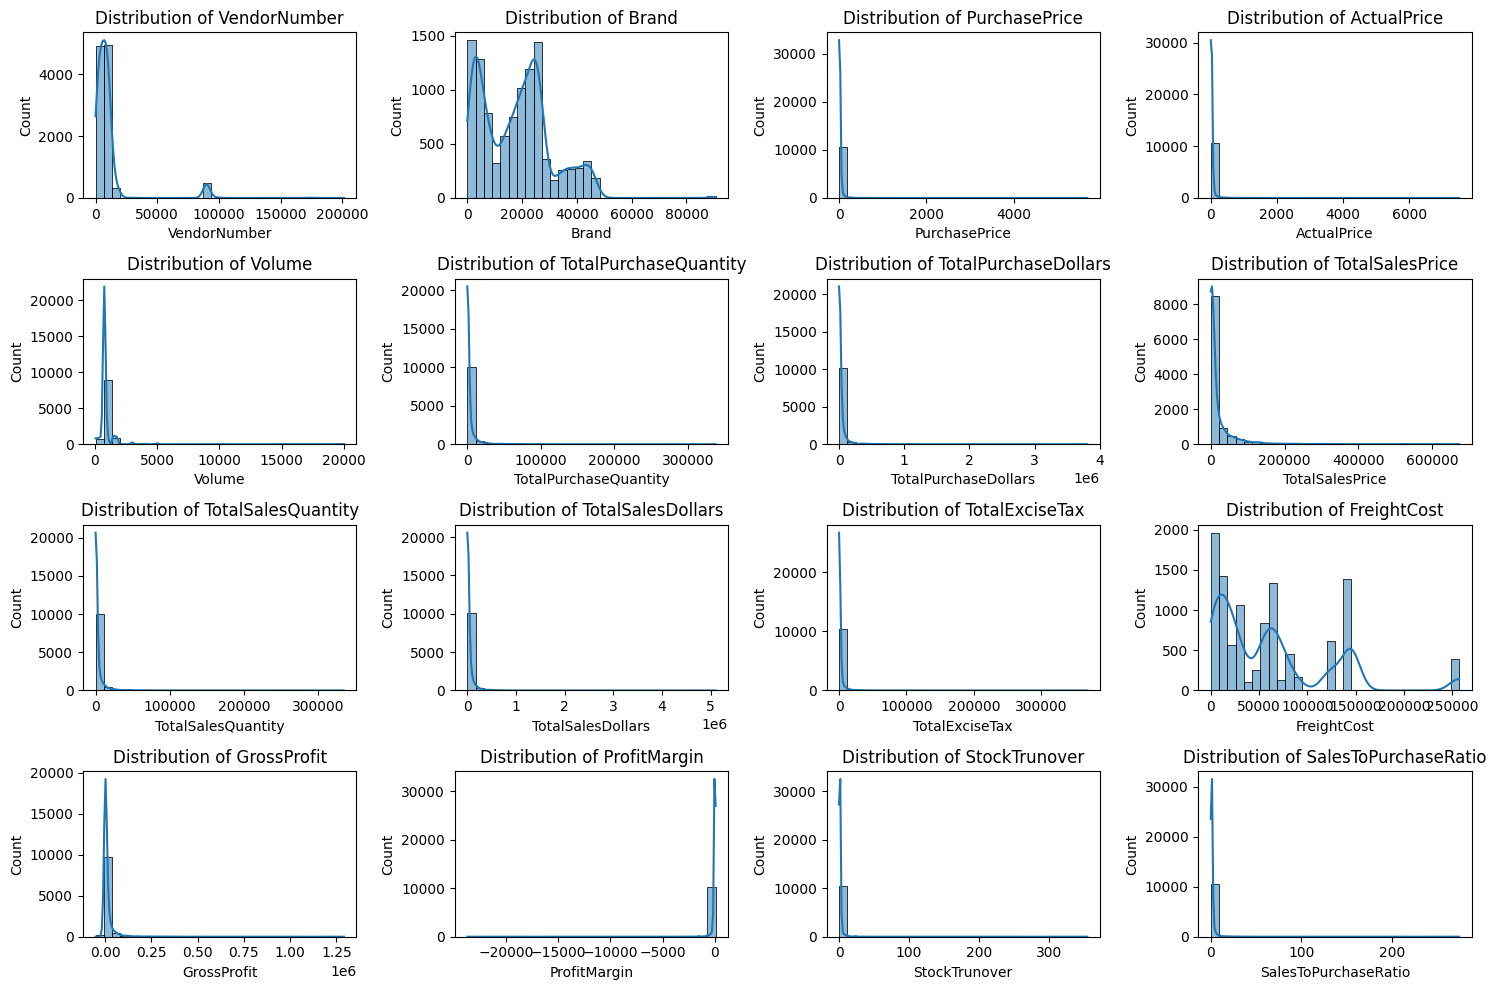

In [15]:
#Distribution plots for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = summary_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(summary_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

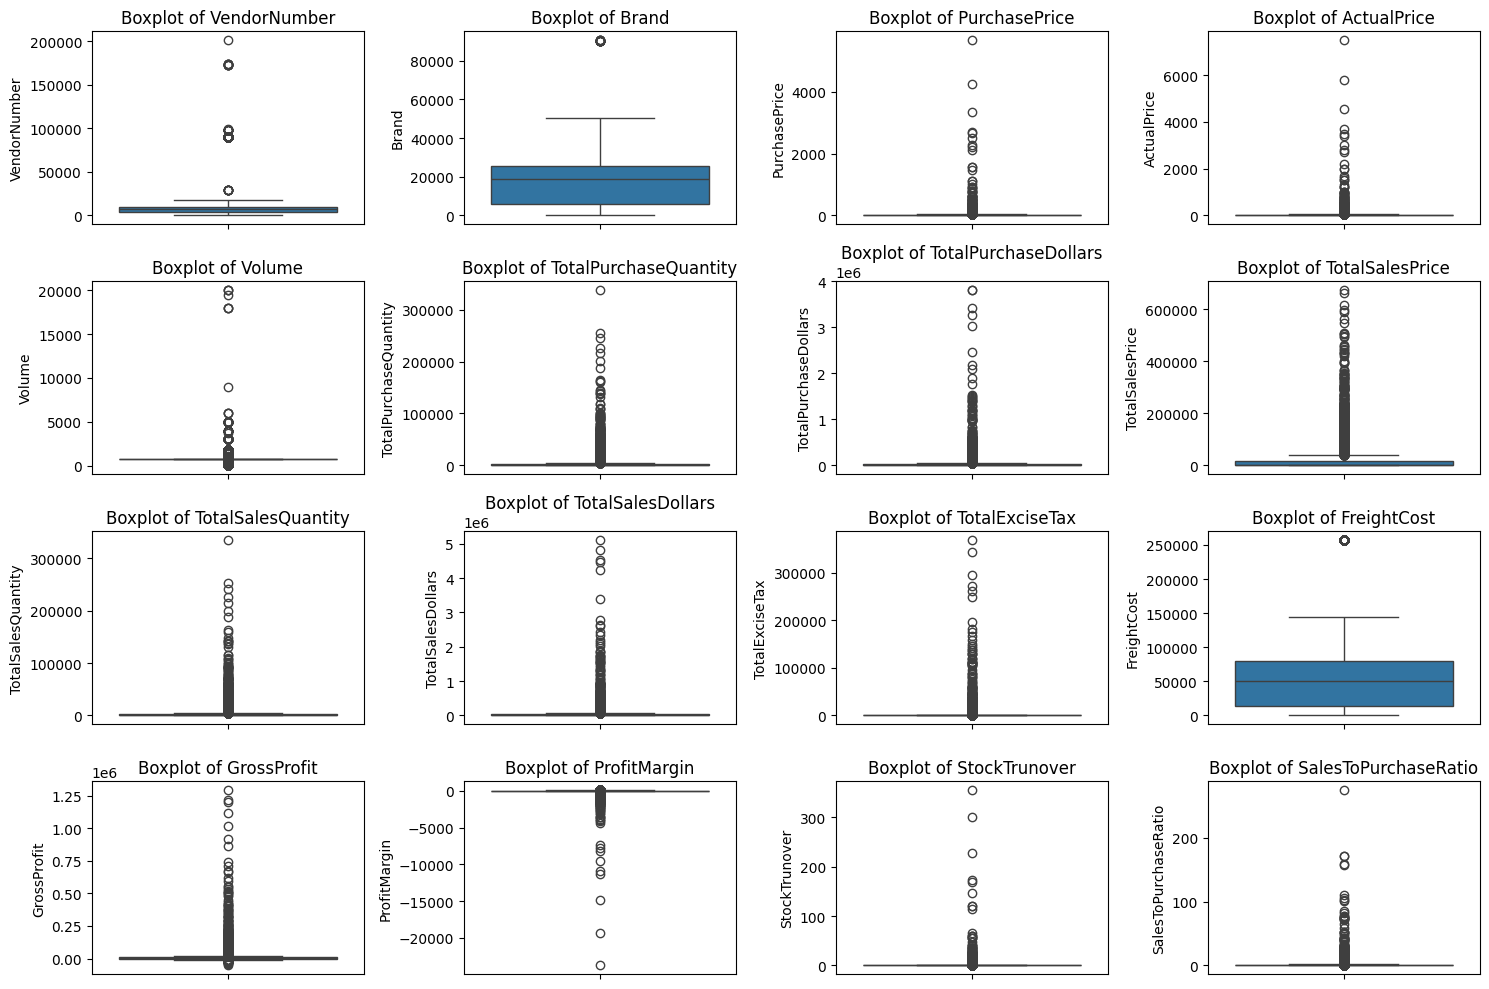

In [17]:
#Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=summary_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

#Summary Statistics Insights

**Negative & Zero Values:**

*   Gross Profit: Minimun value is -52,002.78 indicating losses. Some products or transactions may be selling at a loss due to hight costs or selling at discounts lower than the purchase price.
*   Prodit Margin: Has a minimun of -infinity, which suggests cases where revenue is zero even lower than costs.
*   Total Sales Quantity & Sales Dollars: Minimun values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

*   Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
*   Freight Cost: Huge variation, from 0.09 to 257,032.07 suggests logistics inefficient or bulk shipments.
*   Stock Trunover: Ranges from 0 to 274.5, implying some products sell extremely fast while other remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to earlier sales are being fullfilled from the older stock.

In [131]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07


In [20]:
#Let's filter the data by removing inconsistencies
df = pd.read_sql_query('''
    SELECT * FROM vendor_sales_summary
    WHERE GrossProfit > 0
    AND ProfitMargin >= 0
    AND TotalSalesQuantity > 0
    ''',conn
)

In [21]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTrunover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68,1290667.91,25.297693,1.021338,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,1.023657,0.976890
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,1.001427,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,1.006337,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,1.016718,0.983556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41,13.31,83.448276,0.400000,2.500000
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62,63.32,96.436186,0.044776,22.333333
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87,0.50,25.252525,1.000000,1.000000
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07,141.81,98.974037,0.013889,72.000000


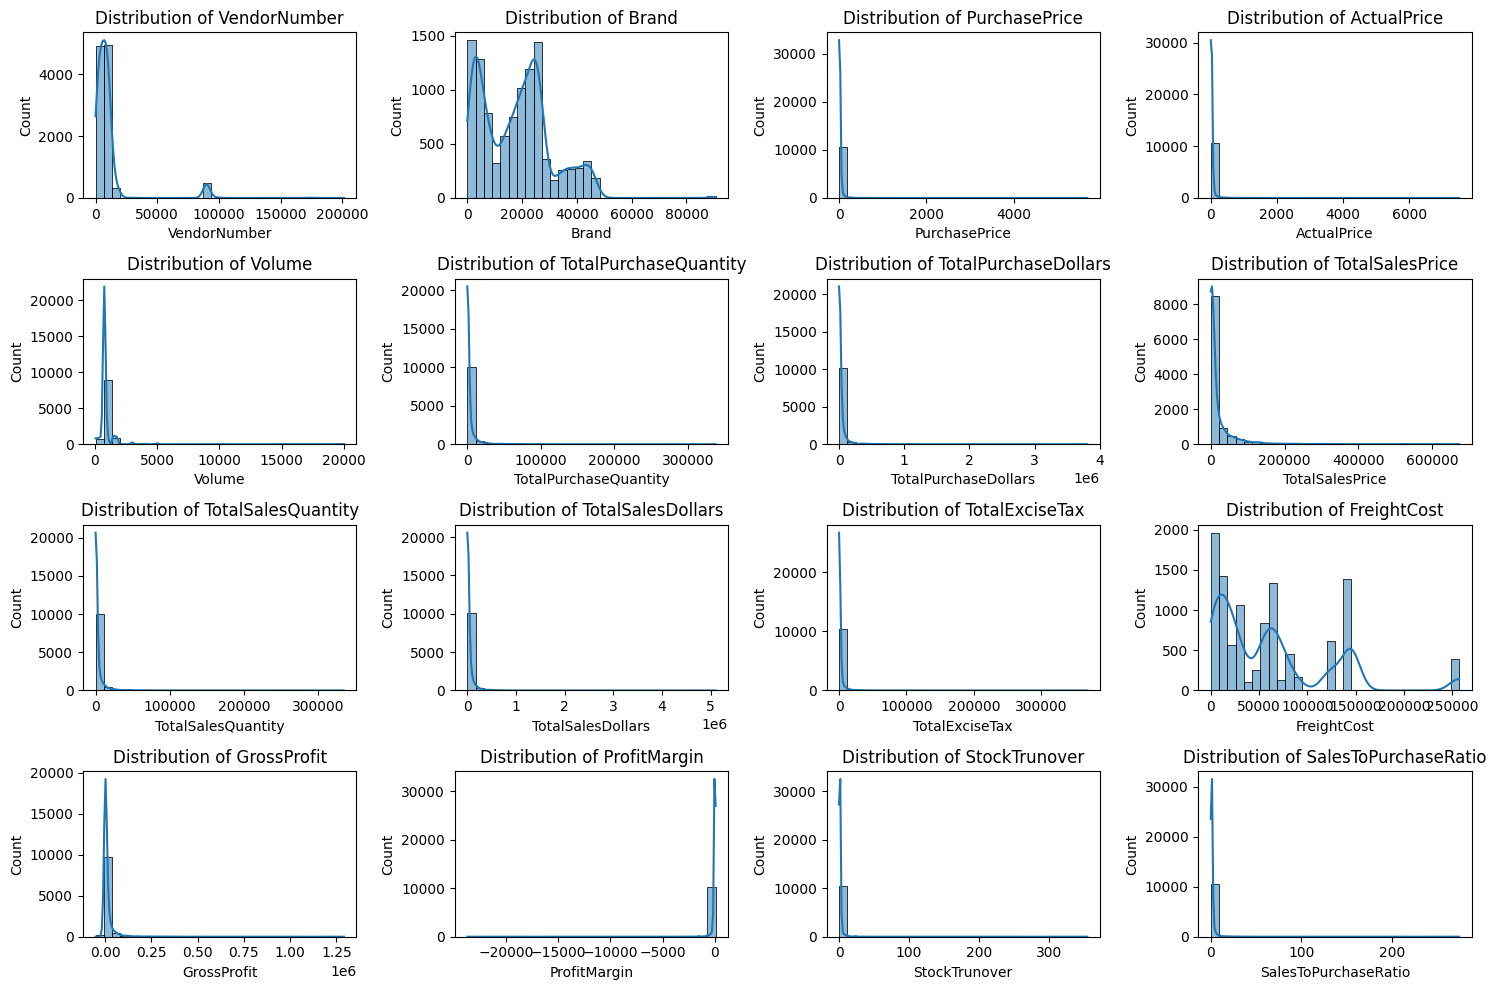

In [22]:
#Distribution plots for numerical columns after cleaning the data
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = summary_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(summary_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

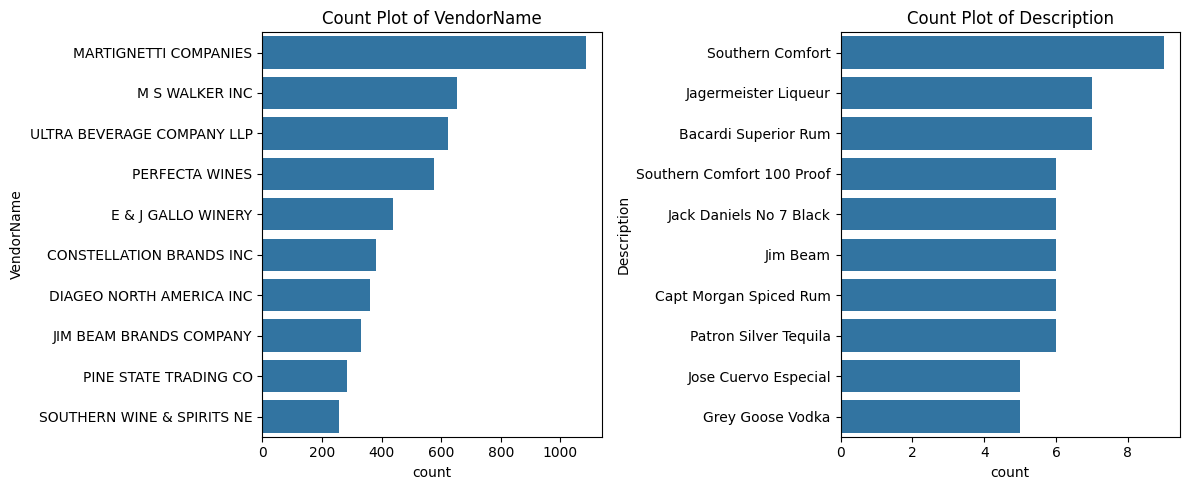

In [24]:
# Count plots for Categorical Columns
categorical_columns = ['VendorName','Description']

plt.figure(figsize=(12, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(y=df[column], order = df[column].value_counts().index[:10]) #Top 10 categories
    plt.title(f'Count Plot of {column}')
plt.tight_layout()
plt.show()

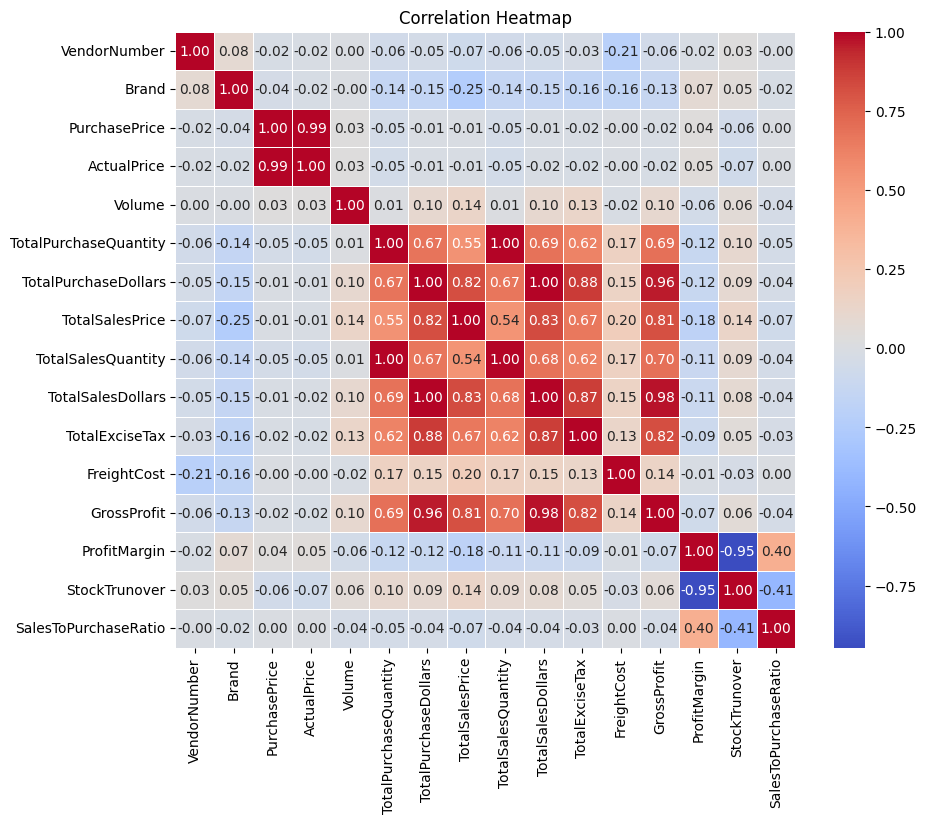

In [27]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), fmt = ".2f", annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Correlation Insights**

*   PurchasePrice has weak correlations with TotalSalesDollars(-0.012) and GrossProfit(-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
*   Strong correlation between total purchase quantity and total sales quantity(0.99), confirming efficient inventory turnover.
*   Negative correlation between proft marign & total sales price(-0.179) suggests that as sales price increases, margin decreases, possibly due to competitive pricing pressure.
*   StockTrunover has weak negative correlations with both GrossProfit (-0.38) and ProfitmArgin(-0.055), indicating that fastest turnover dies not necessarily result in higher profitabilty.

#Data Analysis

**Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.**

In [31]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean',
}).reset_index()

In [32]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

low_sales_threshold,high_margin_threshold

(np.float64(560.299), np.float64(64.97017552750111))

In [33]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] < low_sales_threshold) &
    (brand_performance['ProfitMargin'] > high_margin_threshold)
]

print("Brands with low sales but high profit margins:")
print(target_brands)

Brands with low sales but high profit margins:
                       Description  TotalSalesDollars  ProfitMargin
6       12 Days of Pearls Gift Set             309.69     97.678323
45                  4 Orange Vodka             483.78     85.902683
57       A Bichot Clos Marechaudes             539.94     67.740860
59          A Bichot Merc Champs M             515.88     94.552997
96      Absolut Orient Apple Vodka             119.94     87.652159
...                            ...                ...           ...
7588  Woodford Rsv Master Coll Pnt             489.95     73.760588
7663   Zardetto Pros di Coneg Brut             345.86     88.758457
7677         Zerran Tinto Montsant             139.91     77.592738
7686         Zhenka Vodka 80 Proof             240.39     87.303964
7696                     Zorah Red             417.81     67.559417

[198 rows x 3 columns]


In [37]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] # For better visulization

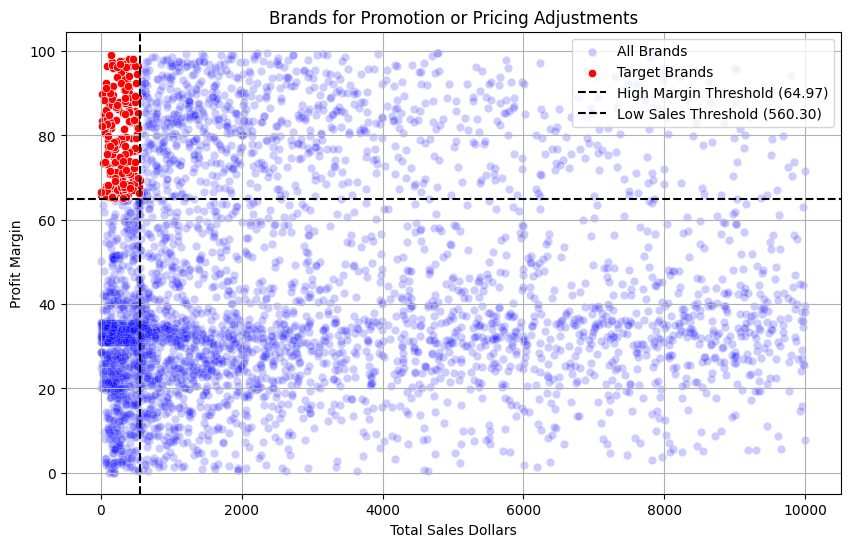

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='Black', label=f'High Margin Threshold ({high_margin_threshold:.2f})')
plt.axvline(low_sales_threshold, linestyle='--', color='Black', label=f'Low Sales Threshold ({low_sales_threshold:.2f})')
plt.title('Brands for Promotion or Pricing Adjustments')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin')
plt.legend()
plt.grid(True)
plt.show()

**Which vendors and brands demonstrate the highest sales performance?**

In [60]:
#Top vendors and brands by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors,top_brands

(VendorName
 DIAGEO NORTH AMERICA INC      6.799010e+07
 MARTIGNETTI COMPANIES         3.933036e+07
 PERNOD RICARD USA             3.206320e+07
 JIM BEAM BRANDS COMPANY       3.142302e+07
 BACARDI USA INC               2.485482e+07
 CONSTELLATION BRANDS INC      2.421875e+07
 E & J GALLO WINERY            1.839990e+07
 BROWN-FORMAN CORP             1.824723e+07
 ULTRA BEVERAGE COMPANY LLP    1.650254e+07
 M S WALKER INC                1.470646e+07
 Name: TotalSalesDollars, dtype: float64,
 Description
 Jack Daniels No 7 Black    7964746.76
 Tito's Handmade Vodka      7399657.58
 Grey Goose Vodka           7209608.06
 Capt Morgan Spiced Rum     6356320.62
 Absolut 80 Proof           6244752.03
 Jameson Irish Whiskey      5715759.69
 Ketel One Vodka            5070083.56
 Baileys Irish Cream        4150122.07
 Kahlua                     3604858.66
 Tanqueray                  3456697.90
 Name: TotalSalesDollars, dtype: float64)

In [102]:
def format_dollars(value):
  if value >= 1000000:
    return f'{value/1000000:.2f}M'
  elif value >= 1000 and value < 1000000:
    return f'{value/1000:.2f}K'
  elif value >= 1000:
    return f'{value:,.2f}'
  else:
    return str(value)

In [62]:
top_brands = top_brands.apply(format_dollars)
top_vendors = top_vendors.apply(format_dollars)

In [63]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7.96M
Tito's Handmade Vodka,7.40M
Grey Goose Vodka,7.21M
Capt Morgan Spiced Rum,6.36M
Absolut 80 Proof,6.24M
Jameson Irish Whiskey,5.72M
Ketel One Vodka,5.07M
Baileys Irish Cream,4.15M
Kahlua,3.60M


In [64]:
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,67.99M
MARTIGNETTI COMPANIES,39.33M
PERNOD RICARD USA,32.06M
JIM BEAM BRANDS COMPANY,31.42M
BACARDI USA INC,24.85M
CONSTELLATION BRANDS INC,24.22M
E & J GALLO WINERY,18.40M
BROWN-FORMAN CORP,18.25M
ULTRA BEVERAGE COMPANY LLP,16.50M


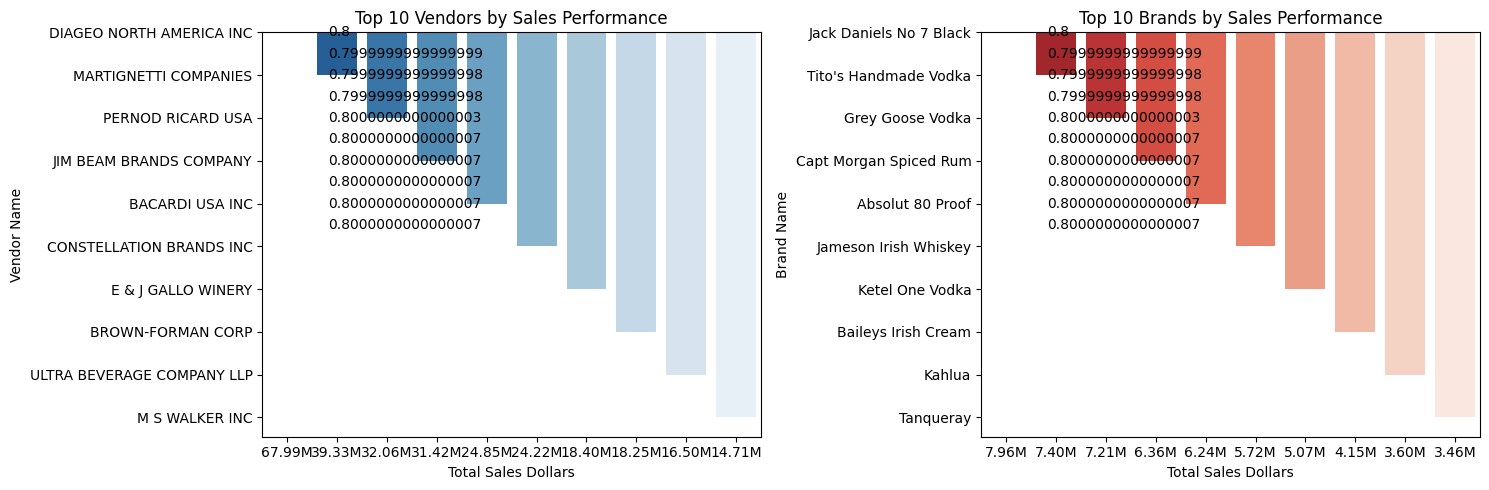

In [65]:
plt.figure(figsize=(15, 5))

#Plot for top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r', hue=top_vendors.values, legend=False)
plt.title('Top 10 Vendors by Sales Performance')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Vendor Name')


for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            va='center',ha='left', fontsize = 10, color="black")

#Plot top 10 brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette='Reds_r', hue=top_brands.values, legend=False)
plt.title('Top 10 Brands by Sales Performance')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Brand Name')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            va='center',ha='left', fontsize = 10, color="black")

plt.tight_layout()
plt.show()

**Which vendors contibute the most to total purchase dollars?**

In [70]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [73]:
vendor_performance['PurchaseContribution'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()) * 100

In [76]:
round(vendor_performance.sort_values('PurchaseContribution', ascending=False),2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [77]:
#Display top 10 Vendors
top_vendors = vendor_performance.nlargest(10, 'PurchaseContribution')
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.300334
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.297719
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.760548
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.644435
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.671926
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.969667
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.307606
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.926789
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.633478
53,M S WALKER INC,9.76M,4.94M,14.71M,3.177053


In [79]:
top_vendors['PurchaseContribution'].sum()

np.float64(65.68955597053622)

In [80]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.300334,16.300334
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.297719,24.598053
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.760548,32.358601
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.644435,40.003037
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.671926,45.674962
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.969667,50.644630
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.307606,54.952236
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.926789,58.879025
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.633478,62.512503
53,M S WALKER INC,9.76M,4.94M,14.71M,3.177053,65.689556


/tmp/ipython-input-83-819876523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors['VendorName'], y = top_vendors['PurchaseContribution'], palette='mako', ax=ax1)
/tmp/ipython-input-83-819876523.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)


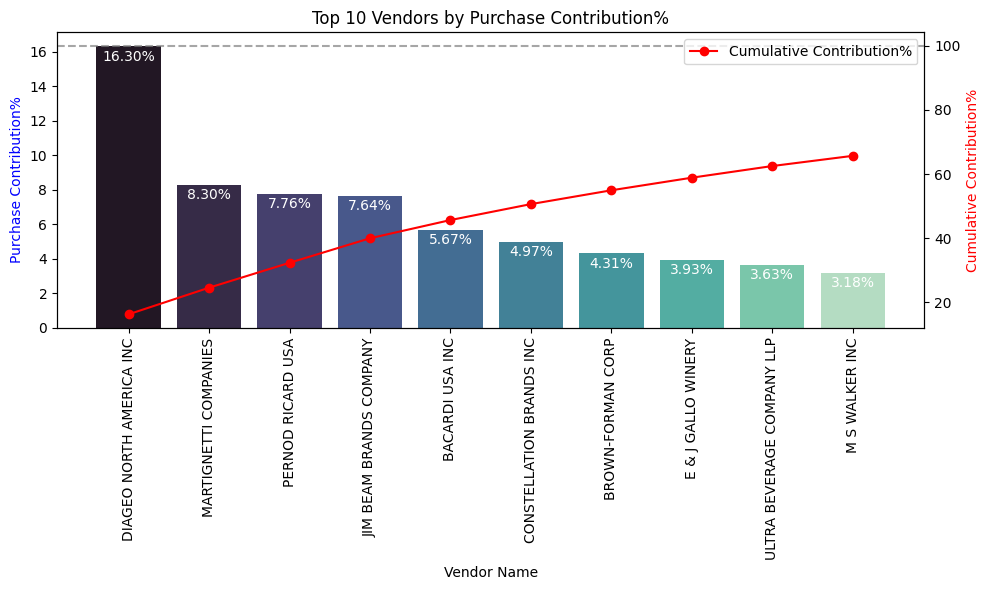

In [83]:
fig, ax1 = plt.subplots(figsize=(10, 6))

#Bar plot for purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y = top_vendors['PurchaseContribution'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution']):
  ax1.text(i, value - 1, f'{value:.2f}%', ha='center', va='bottom',color = "white")

#Line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='-', label='Cumulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_xlabel('Vendor Name')
ax1.set_ylabel('Purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_title('Top 10 Vendors by Purchase Contribution%')

ax2.axhline(y=100,color='gray',linestyle='--',alpha = 0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**How much of total procurement is dependent on the top vendors?**

In [84]:
print(f'Total Purchase Contribution of top 10 vendors: {round(top_vendors["PurchaseContribution"].sum(),2)}%')

Total Purchase Contribution of top 10 vendors: 65.69%


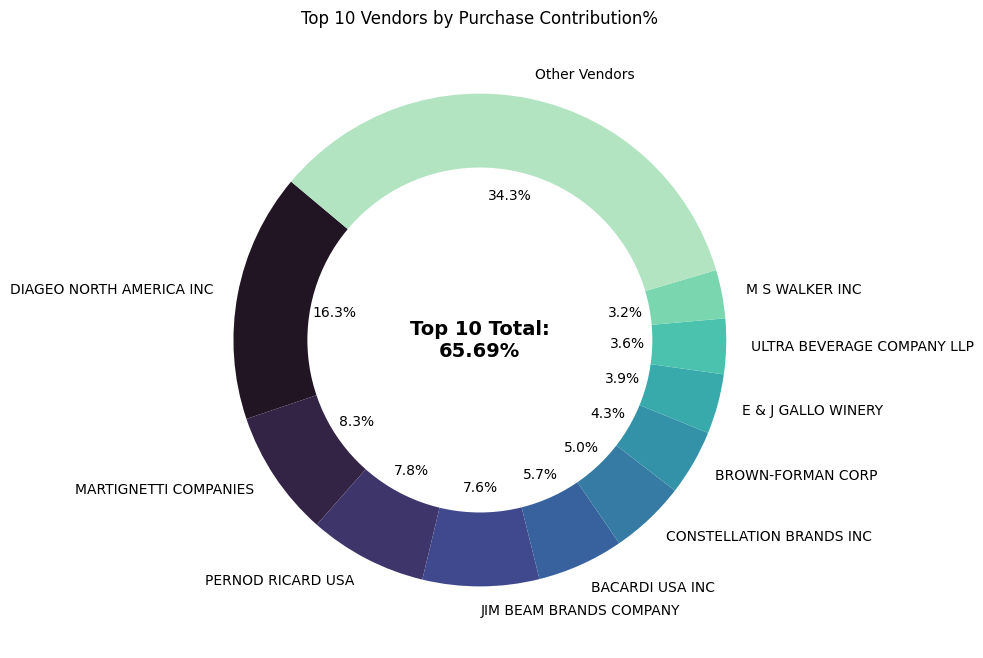

In [86]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Append "other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, colors=sns.color_palette('mako', n_colors=len(vendors)))

#Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

#Add total contribution annotation in the center
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize = 14, fontweight = "bold", ha = "center", va = "center")

plt.title("Top 10 Vendors by Purchase Contribution%")
plt.show()

**Does purchasing in bulk reduce the unot price, and what is the optimal purchase volume for cost savings?**

In [87]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [88]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTrunover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68,1290667.91,25.297693,1.021338,0.979108,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,1.023657,0.976890,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,1.001427,0.998575,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,1.006337,0.993703,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,1.016718,0.983556,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41,13.31,83.448276,0.400000,2.500000,1.32
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62,63.32,96.436186,0.044776,22.333333,0.39
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87,0.50,25.252525,1.000000,1.000000,0.74
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07,141.81,98.974037,0.013889,72.000000,1.47


In [89]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [90]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTrunover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,672819.31,142049.0,5.101920e+06,260999.20,68601.68,1290667.91,25.297693,1.021338,0.979108,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,561512.37,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,1.023657,0.976890,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,461140.15,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,1.001427,0.998575,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,420050.01,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,1.006337,0.993703,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,545778.28,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,1.016718,0.983556,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,10.96,5.0,1.595000e+01,0.55,27100.41,13.31,83.448276,0.400000,2.500000,1.32,Small
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,1.47,134.0,6.566000e+01,7.04,50293.62,63.32,96.436186,0.044776,22.333333,0.39,Small
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.99,2.0,1.980000e+00,0.10,14069.87,0.50,25.252525,1.000000,1.000000,0.74,Small
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,77.61,72.0,1.432800e+02,15.12,257032.07,141.81,98.974037,0.013889,72.000000,1.47,Small


In [91]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

/tmp/ipython-input-91-1505448859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


/tmp/ipython-input-92-1601371551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, palette='mako')


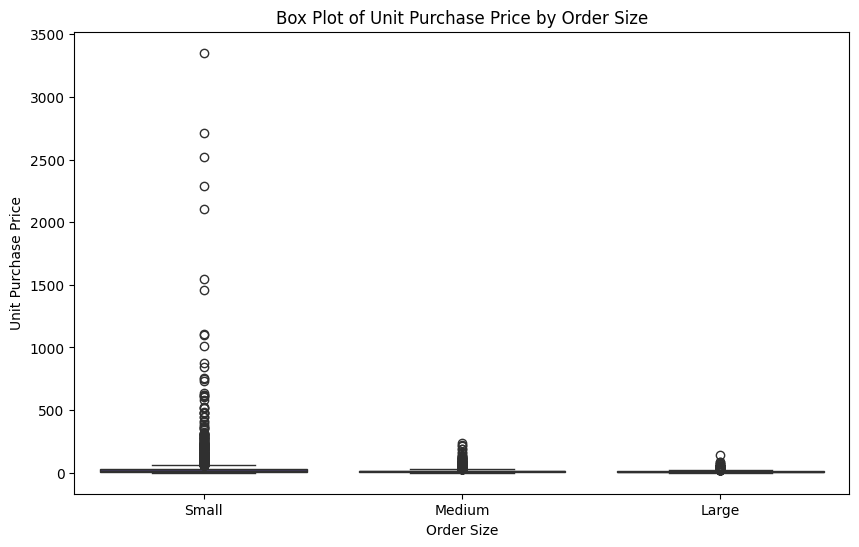

In [92]:
#Plotting box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, palette='mako')
plt.title('Box Plot of Unit Purchase Price by Order Size')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price')
plt.show()

*   Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manager incemtory efficiently.
*   The price difference between small and Lager orders is substantial (~72% reduction in unit cost)
*   This suggest that bulk pricing strategies successfully encourage vendors to purchase in large volumes, leading to higher overall sales despite lower per-unit revenue.

**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**

In [97]:
df[df['StockTrunover'] < 1].groupby('VendorName')[['StockTrunover']].mean().sort_values('StockTrunover', ascending=True).head(10)

,StockTrunover
VendorName,
FLAVOR ESSENCE INC,0.016949
DUGGANS DISTILLED PRODUCTS,0.230769
ATLANTIC IMPORTING COMPANY,0.295581
MOONLIGHT MEADERY,0.295652
CAPSTONE INTERNATIONAL,0.307692
THE PIERPONT GROUP LLC,0.315516
ALISA CARR BEVERAGES,0.324730
STAR INDUSTRIES INC.,0.328744
MILTONS DISTRIBUTING CO,0.333333


**How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [100]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print(f'Total Unsold Inventory Value:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Inventory Value: 2.71M


In [104]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

#Sort vendors with the highest locked capitals
inventory_value_per_vendor = inventory_value_per_vendor.sort_values('UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


**What is the 95% confidence Intervals for Profit margins of top-performing and low-performing vendors.**

In [119]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [120]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [121]:
def confidence_interval(data, confidence=0.95):
  mean_val = np.mean(data)
  std_err = np.std(data, ddof=1) / np.sqrt(len(data)) #Standard error
  t_critical = stats.t.ppf((1+confidence)/2, df=len(data)-1)
  margin_of_error = t_critical * std_err
  lower_bound = mean_val - margin_of_error
  upper_bound = mean_val + margin_of_error
  return mean_val, lower_bound, upper_bound


Top Vendors 95% Confidence Interval: 30.74, 31.61, Mean:  31.17
Low Vendors 95% Confidence Interval: 40.48, 42.62,  Mean:  31.17


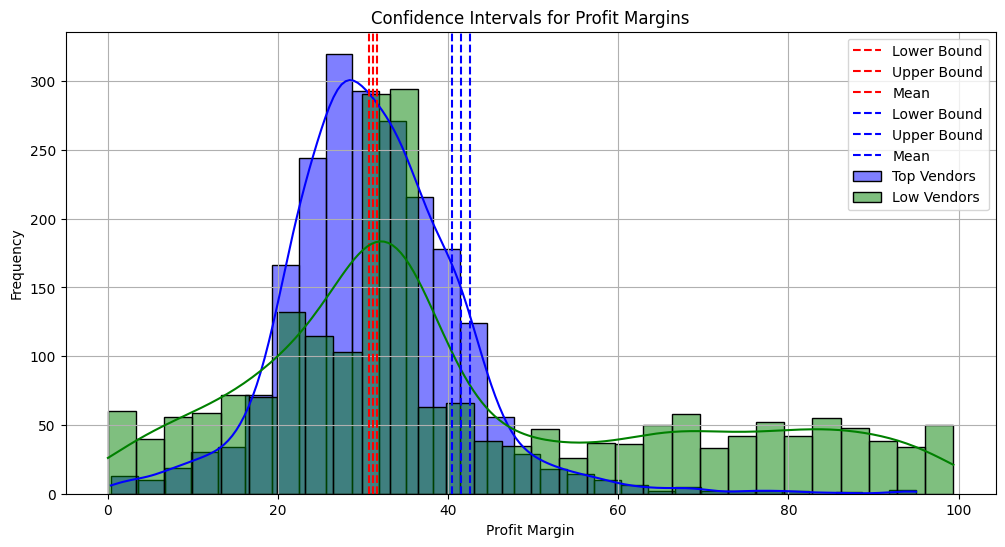

In [122]:
import numpy as np
import scipy.stats as stats

top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% Confidence Interval: {top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean: .2f}")
print(f"Low Vendors 95% Confidence Interval: {low_lower:.2f}, {low_upper:.2f},  Mean: {top_mean: .2f}")

plt.figure(figsize=(12, 6))

#Top vendors plot
sns.histplot(top_vendors, kde=True, bins=30, color='blue', label='Top Vendors')
plt.axvline(top_lower, color='red', linestyle='--', label='Lower Bound')
plt.axvline(top_upper, color='red', linestyle='--', label='Upper Bound')
plt.axvline(top_mean, color='red', linestyle='--', label='Mean')

#low vendor plot
sns.histplot(low_vendors, kde=True, bins=30, color='green', label='Low Vendors')
plt.axvline(low_lower, color='blue', linestyle='--', label='Lower Bound')
plt.axvline(low_upper, color='blue', linestyle='--', label='Upper Bound')
plt.axvline(low_mean, color='blue', linestyle='--', label='Mean')

#Finializing plot
plt.title('Confidence Intervals for Profit Margins')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

*   The CI for low-performing vendors (40.48% to 42.62%) is significantly higher than that of the top-performing vendors (30.74% to 31.61%).
*   This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
*   For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimizations, or building strategies.
*   For Low-performing Vendors: Despite Higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

**Is there a significant difference in profit margins between top-performing and low-performing vendors?**

Hypothesis:

* Ho(Null Hypothesis): There is no significat difference in the mean profit margins of top-performing and low-performing vendors.
* Ha(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [123]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

#Perform two-sample T-test
t_statistic, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)

#Print results
print(f"T-statistic: {t_statistic:.4f} P-value: {p_value:.4f}")
if p_value < 0.05:
  print("Reject Null Hypothesis: There is a significant difference in profit margins between top and low-performing vendors.")
else:
  print("Fail to reject the Null Hypothesis: No Signifiact difference in profit Margin.")

T-statistic: -17.6440 P-value: 0.0000
Reject Null Hypothesis: There is a significant difference in profit margins between top and low-performing vendors.


#Final Insights for Business

**1. Optimizing Inventory and Capital Allocation**

*   **Insight:** A significant portion of capital is tied up in unsold inventory, especially with key vendors.

*   **Metric:** Total unsold inventory is valued at 2.71M Dollars, with top contributors including DIAGEO NORTH AMERICA INC 722K Dollars, JIM BEAM BRANDS COMPANY 555K Dollars, and PERNOD RICARD USA 471K Dollars.

*   **Business Impact:** Enables targeted stock reduction strategies to free up capital, improve inventory turnover, and enhance cash flow efficiency.


**2. Strategic Vendor Management for Procurement Efficiency**

*   **Insight:** A large share of procurement spending is concentrated among a few key vendors.

*   **Metric:** The top 10 vendors account for ~65.7% of total purchase value.

*   **Business Impact:** Emphasizes the need to strengthen vendor relationships to negotiate better terms, reduce costs, and build a resilient supply chain.


**3. Leveraging Bulk Purchasing for Cost Savings**

*   **Insight:** Larger purchase orders result in significant reductions in unit cost.

*   **Metric:** ~72% reduction in unit cost for bulk orders ($10.78) versus small orders 39.06 dollars.

*   **Business Impact:** Supports a strategy to prioritize bulk procurement, driving cost savings and improving profit margins.


**4. Targeted Sales & Marketing for High-Margin, Low-Sales Brands**

*   **Insight:** Some brands offer high margins but suffer from low sales volumes.

*   **Metric:** Identified 198 brands below the 15th percentile in sales and above the 85th percentile in profit margin.

*   **Business Impact:** Focused marketing on these brands can boost profitability without needing high sales volume, optimizing ROI.


**5. Differentiated Strategies for Vendor Profitability**

*   **Insight:** Profit margins vary significantly between low- and high-sales vendors.

*   **Metric:** Low-performing vendors show higher profit margins (40.5%–42.6%) compared to high-performing ones (30.7%–31.6%) at 95% confidence.

*   **Business Impact:** Recommends segmented vendor strategies—optimize volume and ops for high-sales vendors; explore pricing or promotion levers for low-sales, high-margin ones.